In [1]:
import eikon as ek
import datetime as dt
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
import pandas as pd
import numpy as np

ek.set_app_key('89915a3b58874e1599870c6ecc45d6edd6344f8c')

In [21]:
complete_df = pd.read_csv('raw_complete_price.csv',low_memory=False)[['Date','Instrument','CallDate','Price Close']]
complete_df

,Date,Instrument,CallDate,Price Close
0,NaN,BKWB.S,2000-01-01,NaN
1,2000-01-04T00:00:00Z,AGGK.L^H21,2000-01-01,5.880748
2,2000-01-05T00:00:00Z,AGGK.L^H21,2000-01-01,5.911362
3,2000-01-06T00:00:00Z,AGGK.L^H21,2000-01-01,5.925810
4,2000-01-07T00:00:00Z,AGGK.L^H21,2000-01-01,5.857888
...,...,...,...,...
8257842,2022-12-23T00:00:00Z,MORG.DE,2022-12-01,12.100000
8257843,2022-12-27T00:00:00Z,MORG.DE,2022-12-01,12.180000
8257844,2022-12-28T00:00:00Z,MORG.DE,2022-12-01,12.050000
8257845,2022-12-29T00:00:00Z,MORG.DE,2022-12-01,13.300000


In [22]:
complete_df['Price Close'].isna().sum()/len(complete_df)

0.015327845139295993

In [ ]:
complete_pivoted = complete_df.drop_duplicates(['Instrument','Date']).pivot(index='Date',columns='Instrument',values='Price Close')

<AxesSubplot: xlabel='Date'>

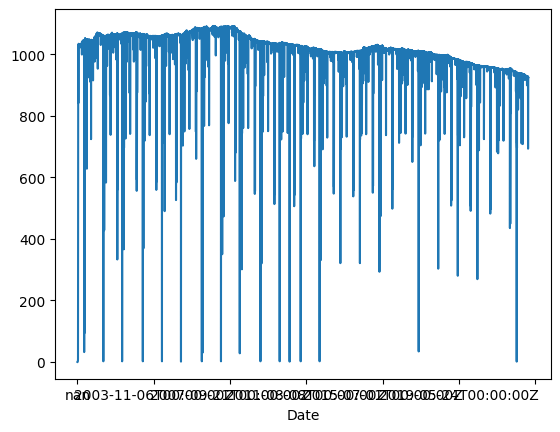

In [ ]:
complete_pivoted.notna().sum(axis=1).plot()

In [10]:
retry_df = pd.read_csv('retry_df_1.csv')

In [11]:
retry_df['Price Close'].isna().sum()/len(retry_df)

0.1677413030692487

In [13]:
retry_pivoted = retry_df.drop_duplicates(['Instrument','Date']).pivot(index='CallDate',columns='Instrument',values='Price Close')

<AxesSubplot: xlabel='CallDate'>

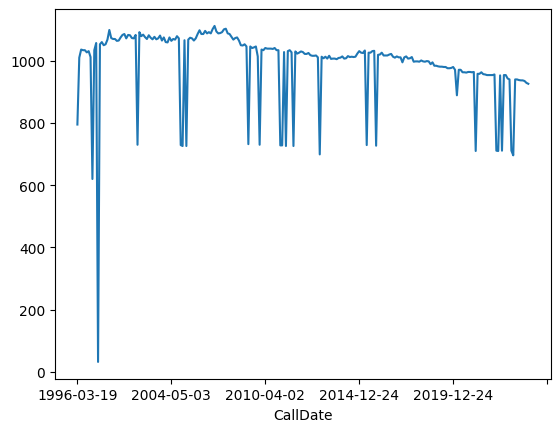

In [14]:
retry_pivoted.notna().sum(axis=1).plot()

In [27]:
complete_pivoted = complete_pivoted.dropna(how='all',axis=1).dropna(how='all',axis=0)
retry_pivoted =retry_pivoted.dropna(how='all',axis=1).dropna(how='all',axis=0)

In [36]:
complete_pivoted = complete_pivoted.set_index(map(lambda x: x[:10],complete_pivoted.index))

In [39]:
start_date = dt.date(2000,1,1)
end_date = dt.date(2023,1,1)
dates_days = [start_date]
i = 0
while (date := start_date + relativedelta(days=i+1)) <= end_date:
    dates_days.append(date)
    i +=1

In [41]:
str_dates_days = list(map(str, dates_days))
sorted_complete_pivoted_df = complete_pivoted[sorted(complete_pivoted)]
sorted_retry = retry_pivoted[sorted_complete_pivoted_df.columns]
dates_dict = {}
for date,values in zip(sorted_complete_pivoted_df.index,sorted_complete_pivoted_df.values):
    dates_dict[date] = values
for date,values in zip(sorted_retry.index,sorted_retry.values):
    dates_dict[date] = values
missing_dates = list(set(str_dates_days) - set(dates_dict.keys()))
for date in missing_dates:
    dates_dict[date] = np.nan

In [42]:
full_df = pd.DataFrame(dates_dict,index=sorted_complete_pivoted_df.columns).T
full_df

Instrument,1COV.DE,1U1.DE,A2.MI,A3M.MC,AAAA.L^C21,AAH.AS^D08,AAK.ST,AAL.L,AALB.AS,AB.L^G07,...,YAR.OL,YIT.HE,YSO.LS,ZALG.DE,ZEL.MC^K15,ZIGGO.AS^L14,ZO1G.DE^A22,ZODC.PA^C18,ZOT.MC^E22,ZURN.S
1996-03-19,NaN,NaN,NaN,NaN,NaN,9.075604,NaN,NaN,2.949571,7.693593,...,NaN,0.939529,0.480272,NaN,0.302559,NaN,NaN,3.262409,1.447795,169.709635
1999-08-16,NaN,10.532114,2.077209,NaN,NaN,21.000000,NaN,14.211333,4.387500,12.536142,...,NaN,1.610684,0.754585,NaN,2.576475,NaN,NaN,3.950000,3.282435,394.984574
1999-12-08,NaN,7.208218,3.154791,NaN,NaN,23.500000,NaN,14.846024,4.000000,9.613619,...,NaN,1.862062,1.186127,NaN,3.323536,NaN,NaN,4.160000,3.027192,407.392389
1999-12-16,NaN,7.198555,3.088676,NaN,NaN,23.690000,NaN,16.857333,4.525000,9.725194,...,NaN,2.029648,1.201939,NaN,3.317653,NaN,NaN,4.260000,2.920316,404.176233
1999-12-21,NaN,6.966655,3.403464,NaN,NaN,24.520000,NaN,16.194144,4.887500,9.833122,...,NaN,1.992407,1.263821,NaN,3.245104,NaN,NaN,4.100000,2.888542,403.124841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

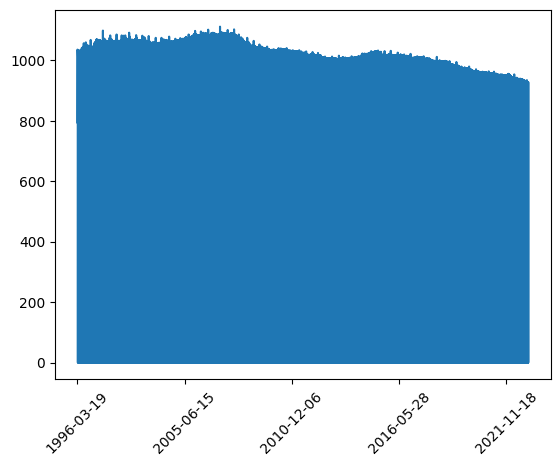

In [46]:
full_df.sort_index().notna().sum(axis=1).plot(rot=45)

<AxesSubplot: >

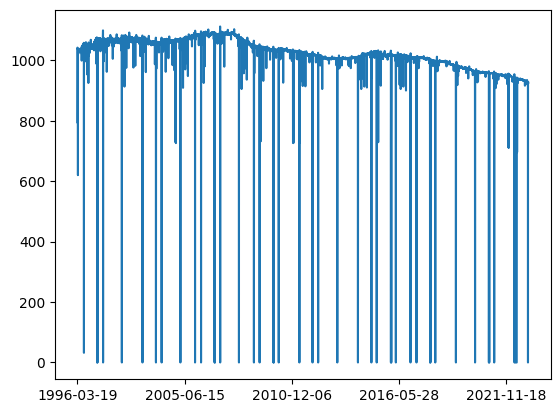

In [50]:
filled_df = full_df.sort_index().fillna(method='ffill',limit=2)
filled_df.notna().sum(axis=1).plot()

In [51]:
retry_df_2 = pd.read_csv('retry_df_2.csv',index_col=0)

In [52]:
retry_df_2

,CallDate,Instrument,Date,Price Close
0,1996-03-19,BKWB.S,NaN,NaN
1,1996-03-19,AGGK.L^H21,NaN,NaN
2,1996-03-19,BITTI.HE,NaN,NaN
3,1996-03-19,FIA_p.MI^E12,1996-03-19T00:00:00Z,5.692102
4,1996-03-19,CMIP.PA^C15,1996-03-19T00:00:00Z,59.606513
...,...,...,...,...
1578,2022-12-26,JM.ST,2022-12-23T00:00:00Z,15.298564
1579,2022-12-26,AGRP.L,2022-12-23T00:00:00Z,0.612332
1580,2022-12-26,TOP.CO,2022-12-23T00:00:00Z,49.169920
1581,2022-12-26,LEGD.PA,2022-12-23T00:00:00Z,75.580000


In [54]:
retry_pivoted_2 = retry_df_2.drop_duplicates(['Instrument','Date']).pivot(index='CallDate',columns='Instrument',values='Price Close')
retry_pivoted_2 =retry_pivoted_2.dropna(how='all',axis=1).dropna(how='all',axis=0)

<AxesSubplot: xlabel='CallDate'>

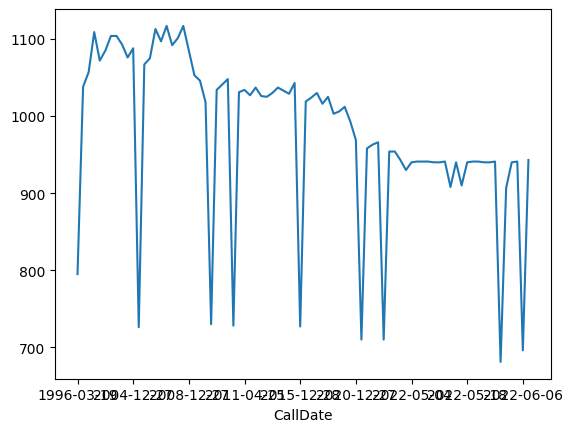

In [55]:
retry_pivoted_2.sort_index().notna().sum(axis=1).plot()

In [59]:
retry_pivoted_2 = retry_pivoted_2[sorted_complete_pivoted_df.columns]

In [60]:
for date, values in zip(retry_pivoted_2.index,retry_pivoted_2.values):
    dates_dict[date] = values

In [62]:
full_df_2 = pd.DataFrame(dates_dict,index=sorted_complete_pivoted_df.columns).T

<AxesSubplot: >

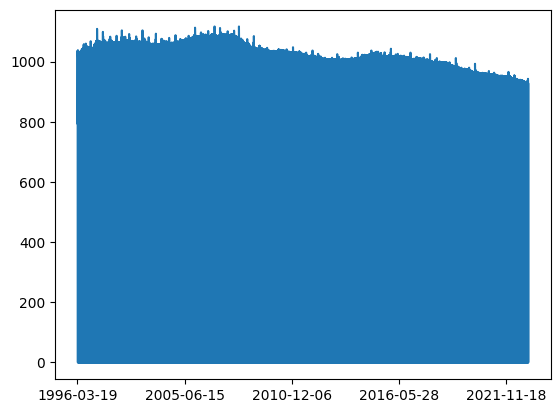

In [64]:
full_df_2.sort_index().notna().sum(axis=1).plot()

<AxesSubplot: >

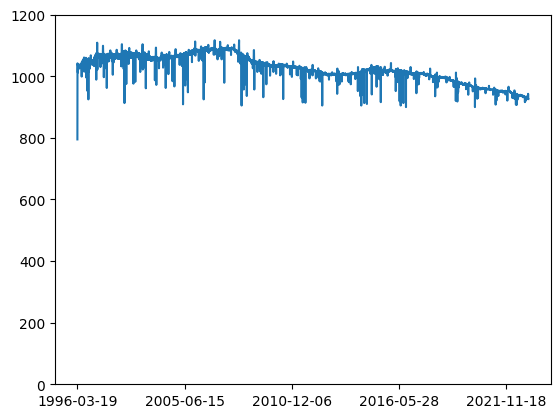

In [81]:
filled_df_2 = full_df_2.sort_index().fillna(method='ffill',limit=2)
filled_df_2.notna().sum(axis=1).plot(ylim=[0,1200])

In [91]:
full_df_2.to_csv('complete_prices.csv')